**READING THE DATA FROM THE DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**UNZIPPING**

In [2]:
!unzip gdrive/MyDrive/assignment/chest_xray.zip 

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: ches

**SPLITTING THE TRAINING DATA INTO TRAIN AND VALIDATION**

In [3]:
!pip install split-folders

In [4]:
import splitfolders # or import splitfolders
input_folder = "/content/chest_xray/train"
output = "/content/chest_xray" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output="output", seed=1337, ratio=(.8,.2), group_prefix=None) # default values



 # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.



Copying files: 5232 files [00:25, 204.01 files/s]


In [5]:
#Some Basic Imports
import matplotlib.pyplot as plt
import numpy as np              
import pandas as pd            
#Directories for train, test & Validation Set
train = '/content/output/train'
test = '/content/chest_xray/test'
valid = '/content/output/val'
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16 
#The dimension of the images we are going to define is 224 x 224
img_height = 224
img_width = 224


**DATA AUGUMENTATION**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [7]:
train = image_gen.flow_from_directory(
      train,
      target_size=(img_height, img_width),
      class_mode='categorical',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test,
      target_size=(img_height, img_width),
      shuffle=False, 
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='categorical',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid,
      target_size=(img_height, img_width),
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 4185 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1047 images belonging to 2 classes.


**RESNET MODEL**

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [9]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

94781440/94765736 [==============================] - 1s 0us/step


In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 2)                1026      
 pper)                                                           
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
____________________________________

In [11]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history = resnet_model.fit(
  train,
  validation_data=valid,
  epochs=10
  
)

Epoch 1/10
262/262 [==============================] - 146s 431ms/step - loss: 0.5150 - accuracy: 0.7536 - val_loss: 0.4052 - val_accuracy: 0.7736
Epoch 2/10
262/262 [==============================] - 111s 423ms/step - loss: 0.4350 - accuracy: 0.7926 - val_loss: 0.3710 - val_accuracy: 0.8290
Epoch 3/10
262/262 [==============================] - 111s 425ms/step - loss: 0.4003 - accuracy: 0.8115 - val_loss: 0.4055 - val_accuracy: 0.7755
Epoch 4/10
262/262 [==============================] - 112s 426ms/step - loss: 0.3980 - accuracy: 0.8208 - val_loss: 0.3430 - val_accuracy: 0.8233
Epoch 5/10
262/262 [==============================] - 112s 425ms/step - loss: 0.3664 - accuracy: 0.8349 - val_loss: 0.3989 - val_accuracy: 0.8500
Epoch 6/10
262/262 [==============================] - 111s 424ms/step - loss: 0.3513 - accuracy: 0.8418 - val_loss: 0.3322 - val_accuracy: 0.8539
Epoch 7/10
262/262 [==============================] - 111s 425ms/step - loss: 0.3518 - accuracy: 0.8473 - val_loss: 0.3216 -

**GRAPHS**

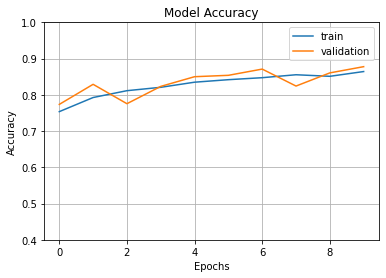

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

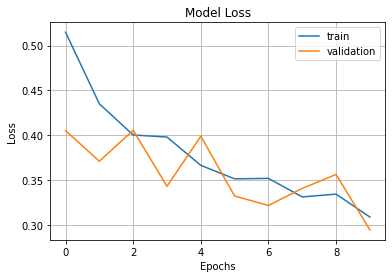

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [15]:
test_accu = resnet_model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

39/39 [==============================] - 8s 203ms/step - loss: 0.3995 - accuracy: 0.8109
The testing accuracy is : 81.08974099159241 %


In [16]:
preds = resnet_model.predict(test,verbose=1)

39/39 [==============================] - 9s 196ms/step


In [29]:
import numpy as numpy
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    '/content/chest_xray/test', # Put your path here
     target_size=(224, 244),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = resnet_model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


In [31]:
import numpy as numpy
test_generator = ImageDataGenerator()
test_steps_per_epoch = numpy.math.ceil(test.samples / test.batch_size)

predictions = resnet_model.predict_generator(test, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


In [32]:
true_classes = test.classes
class_labels = list(test.class_indices.keys())
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

      NORMAL       0.83      0.62      0.71       234
   PNEUMONIA       0.80      0.93      0.86       390

    accuracy                           0.81       624
   macro avg       0.82      0.77      0.79       624
weighted avg       0.81      0.81      0.80       624



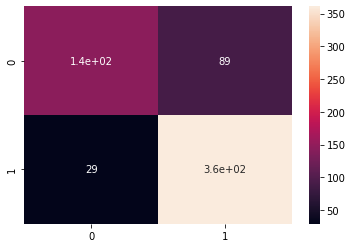

In [33]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(true_classes, predicted_classes), annot = True)


**VGG** **MODEL**

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [35]:

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [36]:
# load VGG16 model without classification layers
vgg16 = VGG16(include_top=False,weights='imagenet', input_shape=(224, 224, 3))


58900480/58889256 [==============================] - 1s 0us/step


In [37]:
for layer in vgg16.layers:
  layer.trainable= False

In [38]:
flatten_layer = Flatten()  # instantiate the layer


In [39]:
X= flatten_layer(vgg16.output)

In [40]:
prediction=Dense(2,activation='softmax')(X)

In [41]:
model=Model(inputs=vgg16.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

**DATA AUGUMENTATION**

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [44]:
train = image_gen.flow_from_directory('/content/output/train',
      target_size=(224, 224),
      class_mode='categorical',
      batch_size=32
      )
test = image_gen.flow_from_directory('/content/chest_xray/test',
      target_size=(224, 224),
      class_mode='categorical',
      batch_size=32
      )
valid= image_gen.flow_from_directory('/content/output/val',
      target_size=(224, 224),
      class_mode='categorical',
      batch_size=32
      )

Found 4185 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1047 images belonging to 2 classes.


In [45]:
r=model.fit_generator(
    train,
    validation_data=valid,
    epochs=10,
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
131/131 [==============================] - 146s 1s/step - loss: 0.2208 - accuracy: 0.9161 - val_loss: 0.1318 - val_accuracy: 0.9484
Epoch 2/10
131/131 [==============================] - 120s 914ms/step - loss: 0.1257 - accuracy: 0.9510 - val_loss: 0.1075 - val_accuracy: 0.9599
Epoch 3/10
131/131 [==============================] - 120s 915ms/step - loss: 0.1023 - accuracy: 0.9601 - val_loss: 0.0921 - val_accuracy: 0.9608
Epoch 4/10
131/131 [==============================] - 121s 928ms/step - loss: 0.1091 - accuracy: 0.9587 - val_loss: 0.1426 - val_accuracy: 0.9513
Epoch 5/10
131/131 [==============================] - 120s 914ms/step - loss: 0.0979 - accuracy: 0.9620 - val_loss: 0.0807 - val_accuracy: 0.9733
Epoch 6/10
131/131 [==============================] - 119s 906ms/step - loss: 0.0741 - accuracy: 0.9716 - val_loss: 0.0822 - val_accuracy: 0.9733
Epoch 7/10
131/131 [==============================] - 122s 929ms/step - loss: 0.0697 - accuracy: 0.9730 - val_loss: 0.1060 - va

**GRAPHS**

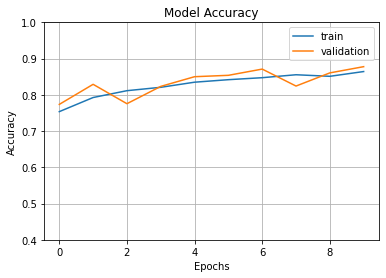

In [46]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

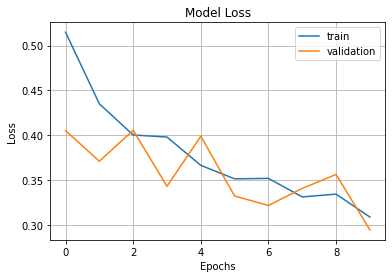

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [48]:
test_accu = model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

20/20 [==============================] - 20s 997ms/step - loss: 0.6021 - accuracy: 0.8526
The testing accuracy is : 85.25640964508057 %


In [49]:
preds = model.predict(test,verbose=1)

20/20 [==============================] - 15s 737ms/step


In [50]:
import numpy as numpy
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    '/content/chest_xray/test', # Put your path here
     target_size=(224, 244),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


In [51]:
true_classes = test.classes
class_labels = list(test.class_indices.keys())
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

      NORMAL       0.86      0.34      0.49       234
   PNEUMONIA       0.71      0.97      0.82       390

    accuracy                           0.73       624
   macro avg       0.79      0.65      0.65       624
weighted avg       0.77      0.73      0.70       624



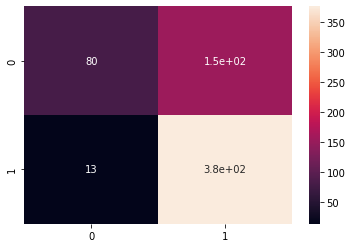

In [52]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(true_classes, predicted_classes), annot = True)


**GRADCAM**

In [ ]:

# load the model with pretrained weights on ImageNet 
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# load the image and preprocess it
img = load_img('/content/output/train/PNEUMONIA/person1000_virus_1681.jpeg'), target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

In [ ]:
# separate the classifier layer names in a list
classifier_layer_names = ['block5_pool', 'flatten', 'fc1', 'fc2', 
                          'predictions']

In [ ]:

# get the last conv layer
last_conv_layer = model.get_layer('block5_conv3')

# new model that outputs last conv layer's feature map
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

In [ ]:

# We create a model that maps the activations of the last conv
# layer to the final class predictions

classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
  x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [ ]:

# Then, we compute the gradient of the top predicted class for our input image
# with respect to the activations of the last conv layer

with tf.GradientTape() as tape:
    # Compute activations of the last conv layer and make the tape watch it
    last_conv_layer_output = last_conv_layer_model(img)
    tape.watch(last_conv_layer_output)
    # Compute class predictions
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

In [ ]:
# This is the gradient of the top predicted class with regard to
# the output feature map of the last conv layer
grads = tape.gradient(top_class_channel, last_conv_layer_output)

# This is a vector where each entry is the mean intensity of the gradient
# over a specific feature map channel
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the top predicted class
last_conv_layer_output = last_conv_layer_output.numpy()[0]
pooled_grads = pooled_grads.numpy()
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(last_conv_layer_output, axis=-1)

# For visualization purpose, we will also normalize the heatmap between 0 & 1
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

49152/35363 [=========================================] - 0s 0us/step
[('n04040759', 'radiator', 0.22016001)]


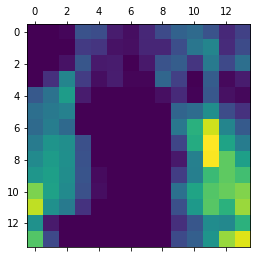

In [ ]:
from keras.applications.vgg16 import decode_predictions

# print top class prediction

print(decode_predictions(model.predict(img), top=1)[0])
# Display heatmap
plt.matshow(heatmap)
plt.show()

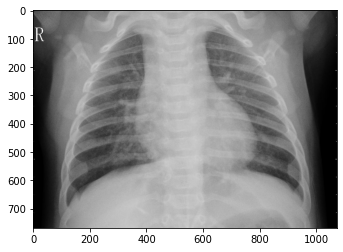

In [ ]:
# load original image
orig_img = keras.preprocessing.image.load_img('/content/output/train/PNEUMONIA/person1000_virus_1681.jpeg')

# upsample the heatmap
upsample = resize(heatmap, (224,224),preserve_range=True)

# show the heatmap overlayed on original image
plt.imshow(orig_img)
# plt.imshow(upsample,alpha=0.7)
plt.show()